# TD2: Spatial Discretization with Spectral Methods I

When facing a spatial differential equation that we want to solve numerically, with spatial discretization methods we want to compute all values $f(x_0), ..., f(x_N)$ of a discretized function $f$ simultaneously. Spatial discretization methods are therefore opposed to temporal discretization methods for which the computation of $f(t_{i+1})$ relies on the previous values $f(t_0),..., f(t_i)$.

In this TD we will not be interested yet in solving a spatial differential equation as we first need to get familiar with methods to approximate a function $f$, and we will focus here on **spectral methods**. We recall that spectral methods rely on the expansion of a function $f$ on a basis of functions $\{\phi_k\}_k$ (in a function space we do not specify at this point). The coefficients of the expansion will be noted $\hat{f}_k$. Thus we have:
$$
    f(x) = \sum_{k}\hat{f}_k\phi_k(x)
$$

The choice of the basis $\{\phi_k\}_k$ is obviously crucial for the efficiency of a numerical calculation. We will make sure for a practical case that the chosen basis meets the following requirements:
* **Convergence:** the series should converge rapidly enough to the function $f$
* **Transformation:** the computation of the coefficients $\hat{f}_k$ should be numerically fast, as well as the inverse transformation
* **Differentiation:** it should be easy to compute the derivative of $f$ through its expansion, meaning we can determine $\widehat{f^\prime}_k$ easily

As usual, we will need the following packages:

In [1]:
# To draw matplotlib plots within this notebook.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Part 1: Fourier interpolation

In spectral methods, given a set of points $\{x_k\}_k$ we define the interpolant $\mathbb{I}_N[f]$ of a function $f$ based on the series representation of $f$ on the basis $\{\phi_k\}_k$. Thus, we approximate $f$ by a truncated series:
$$
    \mathbb{I}_N[f] = \sum_{k = 0}^{N}\hat{f}_k\phi_k
$$
(depending on the chosen basis, we can have slightly different definitions of $\mathbb{I}_N[f]$). This function in an interpolation of $f$, and should therefore satisfy $\forall k, f(x_k) = \mathbb{I}_N[f](x_k)$.

### Fourier basis

In this TD we only consider a Fourier basis $\phi_k(x) = e^{i k x}$ in the function space $L^2([0,2\pi])$. We choose the spatial domain $[0, 2\pi]$ for convenience in the expression of the following formula, but any scaling would make the following transposable to any compact domain $[a,b]$. We also define a set of $N$ regularly spaced points in this domain $\{x_m = \frac{2\pi m}{N}, m = 0, ..., N - 1\}$. Now for a function $f$, we define its approximation by the interpolant:
$$
    \mathbb{I}_N[f](x) = \sum_{k = \left \lfloor{-N/2}\right \rfloor + 1}^{\left \lfloor{N/2}\right \rfloor}{\hat{f}_k e^{ikx}}
$$
Note that this function is a continuous function, therefore it can be evaluated at any point in $[0,2\pi]$. The determination of the interpolant is directly related to the FFT such as defined in the [*numpy* implementation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html): the coefficients $\hat{f}_k$ are those computed by *np.fft.fft(y) / N* where *y* is the vector of values of the set $\{f(x_m)\}_m$ and $N$ the length of *y*. We will pay attention to the order of the coefficients returned by *np.fft.fft* function. We also recall that the FFT algorithm has a $\mathcal{O}(N\log(N))$ complexity.

**1)** Write a function which computes from a given set of values $\{f(x_m)\}_m$ the interpolant coefficients $\{\hat{f}_k\}_k$. Complexity should be a $\mathcal{O}(N\log(N))$.

In [2]:
def fourier_transform(y):
    return np.fft.fft(y) / len(y)

**2)** Write a function which computes from an arbitrary set of points and for a given set of coefficients $\{\hat{f}_k\}_k$ the values of $\mathbb{I}_N[f]$ evaluated at the input points. We will not care about the complexity of the algorithm.

In [3]:
def fourier_interpolant(y, x):
    ret = np.zeros(len(x), dtype=complex)
    k = 2 * np.pi * np.fft.fftfreq(len(y), 2*np.pi / len(y))
    for i in range(len(y)):
        ret = ret + y[i]*np.exp(1j*k[i]*x)
    return ret

**3)** Is $\mathbb{I}_N[f]$ always a real function?

<span style="color:red">**Answer:**<br/><br/>
No it is not. Let us see what is going on when $N$ is even.
We can write $N = 2n$ and then reexpress:
$$
    \mathbb{I}_N[f](x) = \sum_{k = -n + 1}^{n}{\hat{f}_k e^{ikx}} = \hat{f}_0 + \sum_{k = 1}^{n - 1}{\left(\hat{f}_k e^{ikx} + \hat{f}_{-k}e^{-ikx}\right)} + \hat{f}_n e^{inx}
$$
For a real function $f$, the definition of the Discrete Fourier Transform (DFT) tells us that $\hat{f}_0 \in \mathbb{R}$ (it is also the mean value of the signal), we also have $\hat{f}_{-k} = {\hat{f}_{k}}^*$ when $k \in \{1,..., n-1\}$ so that $\hat{f}_k e^{ikx} + \hat{f}_{-k}e^{-ikx} \in \mathbb{R}$ for $k \in \{1,..., n-1\}$. What remains is the last term $\hat{f}_n e^{inx}$. The definition of the DFT gives us $\hat{f}_n \in \mathbb{R}$, but $e^{inx}$ obviously is not a real function. Then $\mathbb{I}_{2n}[f]$ is a complex function.
For odd values of $N$, this problematic term disappears and $\mathbb{I}_{2n+1}[f]\in\mathbb{R}$.
</span>

We will use and assume an **odd value of $N$** in the following.

**4)** Compare by plotting on $[0,2\pi]$ in the following cases the exact function with its interpolant for several values of $N$:
* $f(x) = \cos(x) + \sin(2x)$
* $  f(x) = \begin{cases}
    \frac{\pi}{4} & \text{if } 0 \leq x < \pi \\
    -\frac{\pi}{4} & \text{if } \pi \leq x < 2\pi
  \end{cases}$
* $ f(x) = \sin (2x)\exp\left(\cos\left(8x\right)\right)$
  
Can you observe the Gibbs phenomenon for one of these functions?

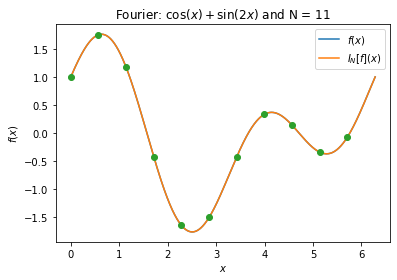

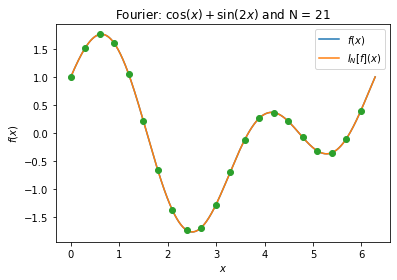

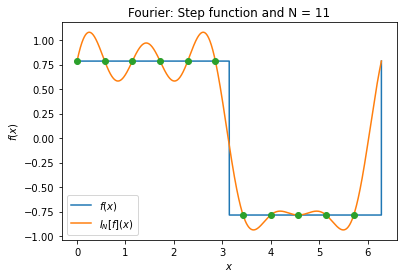

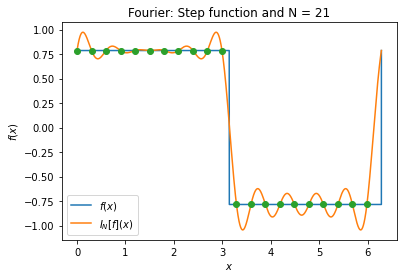

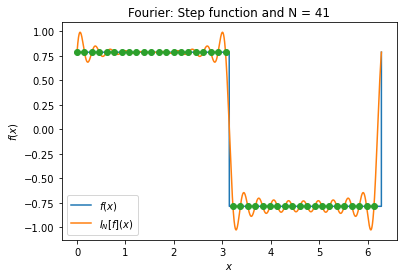

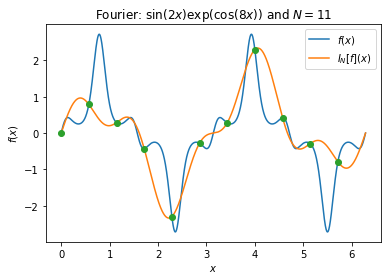

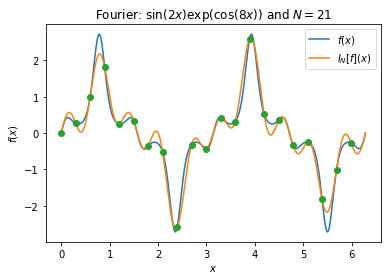

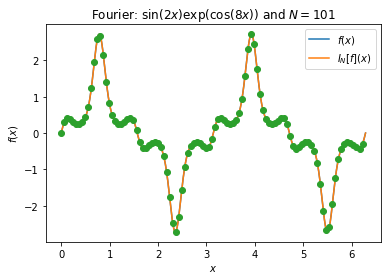

In [4]:
# Test functions definitions
f1 = lambda x: np.cos(x) + np.sin(2*x)
def f2(x):
    ret = np.ones(len(x))
    ret[x % (2 * np.pi) < np.pi] = np.pi / 4.0
    ret[x % (2 * np.pi) >= np.pi] = -np.pi / 4.0
    return ret
f3 = lambda x: np.sin(2 * x) * np.exp(np.cos(8 * x))

def plot_fourier_interpolant(f, N, title=""):
    # Grid values
    xF = np.linspace(0, 2 * np.pi, N, endpoint=False)
    
    # Plot values
    x = np.linspace(0, 2 * np.pi, 10000)
    
    # Transformation and evaluation of the interpolant
    fk = fourier_transform(f(xF))
    f_interpolant = fourier_interpolant(fk, x)
    
    # Plot
    plt.figure()
    plt.plot(x, f(x), label="$f(x)$")
    plt.plot(x, np.real(f_interpolant), label="$I_N[f](x)$")
    plt.plot(xF, f(xF), 'o')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend()
    plt.title(title)
    plt.show()


# For this function, the interpolant is equal to the function provided that N >= 5
plot_fourier_interpolant(f1, 11, r"Fourier: $\cos(x) + \sin (2x)$ and N = 11")
plot_fourier_interpolant(f1, 21, r"Fourier: $\cos(x) + \sin (2x)$ and N = 21")

# The step function is discontinuous. A Gibbs phenomenon emerge from the discontinuity.
# The height of the overshoot converges to a non zero value.
# Therefore, Fourier interpolation cannot be used for a numerical problem that has discontinuities (such as shocks...)
plot_fourier_interpolant(f2, 11, "Fourier: Step function and N = 11")
plot_fourier_interpolant(f2, 21, "Fourier: Step function and N = 21")
plot_fourier_interpolant(f2, 41, "Fourier: Step function and N = 41")

# This function is $C^\infty$, but we need to increase the order of the interpolation high enough to get a proper approximation of the function.
plot_fourier_interpolant(f3, 11, r"Fourier: $\sin (2x)\exp\left(\cos\left(8x\right)\right)$ and $N = 11$")
plot_fourier_interpolant(f3, 21, r"Fourier: $\sin (2x)\exp\left(\cos\left(8x\right)\right)$ and $N = 21$")
plot_fourier_interpolant(f3, 101, r"Fourier: $\sin (2x)\exp\left(\cos\left(8x\right)\right)$ and $N = 101$")

## Part 2: Spectral differentiation with Fourier representation

Spectral representations will be useful to solve a differential equation only if we can easily differentiate them. In this part, we will see how we can do that within a Fourier representation of a given function $f$.

### Fourier representation

Using the same notations as before, we already defined an interpolant $\mathbb{I}_N[f]$ which approximates $f$. It is easy to differentiate $\mathbb{I}_N[f]$:
$$
    \mathbb{I}_N[f]^\prime(x)= \sum_{k = \left \lfloor{-N/2}\right \rfloor + 1}^{\left \lfloor{N/2}\right \rfloor}{ik\hat{f}_k e^{ikx}}
$$
Now we can wonder if this function is still a good approximation of $f^\prime$.

**1)** Write a function which computes the coefficients of $\mathbb{I}_N[f]^\prime$ given the set of $\{\hat{f}_k\}_k$.

In [5]:
def fourier_diff(fk):
    k = 2 * np.pi * np.fft.fftfreq(len(fk), 2*np.pi/len(fk))
    return 1j * k * fk

**2)** Using *np.fft.ifft* function ($\mathcal{O}(N\log(N))$ complexity), write a function which computes the values $\{\mathbb{I}_N[f]^\prime(x_m)\}_m$ given the coefficients of $\mathbb{I}_N[f]^\prime$. Complexity of the algorithm should be a $\mathcal{O}(N\log(N))$.

In [6]:
def fourier_inv_transform(fk):
    return len(fk) * np.fft.ifft(fk)

**3)** Compare by plotting the exact value of $f^\prime$ and the approximation $\mathbb{I}_N[f]^\prime$ in the following cases:
* $f(x) = \cos(x) + \sin(2x)$
* $  f(x) = \begin{cases}
    \frac{\pi}{4} & \text{if } 0 \leq x < \pi \\
    -\frac{\pi}{4} & \text{if } \pi \leq x < 2\pi
  \end{cases}$
* $ f(x) = \sin (2x)\exp\left(\cos\left(8x\right)\right)$

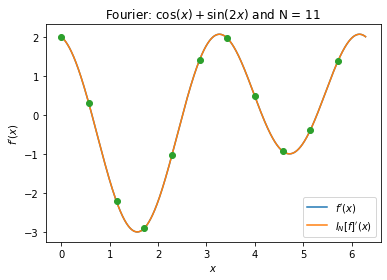

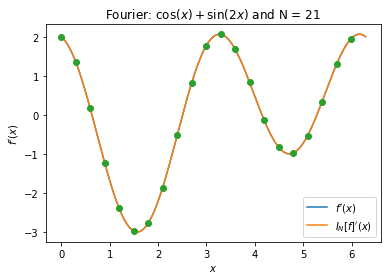

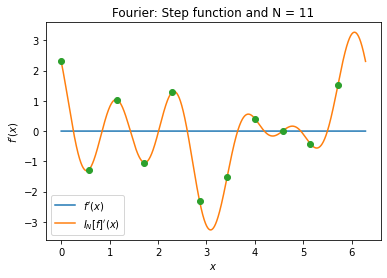

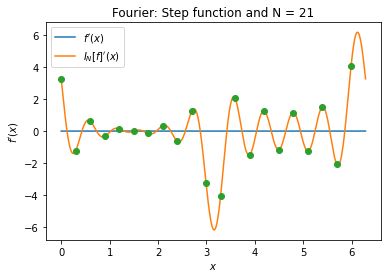

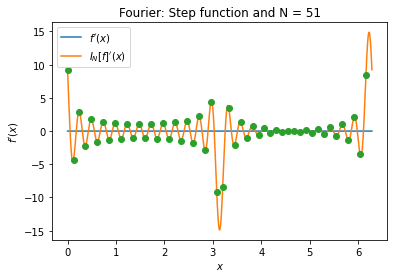

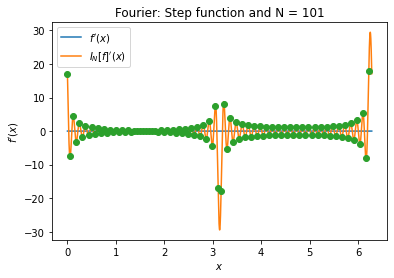

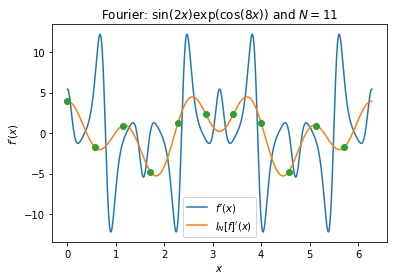

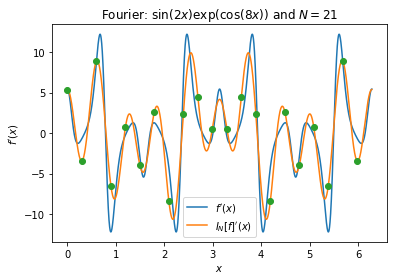

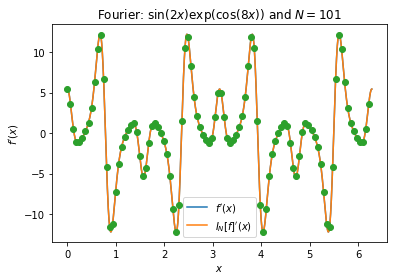

In [7]:
# Test functions and their derivatives definitions
f1 = lambda x: np.cos(x) + np.sin(2*x)
f1p = lambda x: -np.sin(x) + 2*np.cos(2*x)
def f2(x):
    ret = np.ones(len(x))
    ret[x % (2 * np.pi) < np.pi] = np.pi / 4.0
    ret[x % (2 * np.pi) >= np.pi] = -np.pi / 4.0
    return ret
def f2p(x):
    ret = np.zeros(len(x))
    ret[x % np.pi == 0] = np.nan # Nan values at discontinuities
    return ret
f3 = lambda x: np.sin(2*x) * np.exp(np.cos(8*x))
f3p = lambda x: (2*np.cos(2*x) - 8*np.sin(8*x)*np.sin(2*x))*np.exp(np.cos(8*x))

def plot_fourier_diff_interpolant(f, fp, N, title=""):
    # Grid values
    xF = np.linspace(0, 2 * np.pi, N, endpoint=False)
    
    # Plot values
    x = np.linspace(0, 2 * np.pi, 10000)
    
    # Transformation and evaluation of the interpolant
    fk = fourier_transform(f(xF))
    fpk = fourier_diff(fk)
    fp_interpolant = fourier_interpolant(fpk, x)
    
    # Plot
    plt.figure()
    plt.plot(x, fp(x), label=r"$f^\prime(x)$")
    plt.plot(x, np.real(fp_interpolant), label=r"$I_N[f]^\prime(x)$")
    plt.plot(xF, np.real(fourier_inv_transform(fpk)), 'o')
    plt.xlabel('$x$')
    plt.ylabel(r'$f^\prime(x)$')
    plt.legend()
    plt.title(title)
    plt.show()


# The interpolation is equal to the function for these values of N, so is the derivative.
plot_fourier_diff_interpolant(f1, f1p, 11, r"Fourier: $\cos(x) + \sin (2x)$ and N = 11")
plot_fourier_diff_interpolant(f1, f1p, 21, r"Fourier: $\cos(x) + \sin (2x)$ and N = 21")

# For the step function, the Gibbs phenomenon gives huge values of the derivative around the discontinuities.
# We are all the more convinced to avoid Fourier interpolation for discontinuous functions!
plot_fourier_diff_interpolant(f2, f2p, 11, "Fourier: Step function and N = 11")
plot_fourier_diff_interpolant(f2, f2p, 21, "Fourier: Step function and N = 21")
plot_fourier_diff_interpolant(f2, f2p, 51, "Fourier: Step function and N = 51")
plot_fourier_diff_interpolant(f2, f2p, 101, "Fourier: Step function and N = 101")

# For this function, if the order of the interpolation is not high enough, the values of the derivative are not satisfactory.
# But for high orders, we get proper derivatives.
# Thus we definitely need to take into account high frequencies for this function!
plot_fourier_diff_interpolant(f3, f3p, 11, r"Fourier: $\sin (2x)\exp\left(\cos\left(8x\right)\right)$ and $N = 11$")
plot_fourier_diff_interpolant(f3, f3p, 21, r"Fourier: $\sin (2x)\exp\left(\cos\left(8x\right)\right)$ and $N = 21$")
plot_fourier_diff_interpolant(f3, f3p, 101, r"Fourier: $\sin (2x)\exp\left(\cos\left(8x\right)\right)$ and $N = 101$")


Note that we have been dealing so far with Fourier interpolation and Fourier differentiation only for odd values of N. Indeed, it is easier to define a real interpolant when symmetric modes are involved.

Dealing with even values of $N$ can be more technical, curious readers could take a look at [Steven G. Johnson notes](https://math.mit.edu/~stevenj/fft-deriv.pdf) to get a deeper understanding of what is behind the definition of a Fourier interpolant.

## Part 3: Aliasing around an example...

Aliasing effects are caused by the fact that on a discrete grid $\{x_m = \frac{2\pi m}{N}, m = 0, ..., N - 1\}$, all modes $\{\phi_{k + jN}(x) = e^{i(k+jN)x}\}_{j\in\mathbb{Z}}$ are indistinguishable (they are *aliases* of one another). Let us see on an example what it can look like...

Let us consider the following functions of $L^2([0,2\pi])$:
* $u(x) = \cos (2x)$
* $v(x) = \sin (x)$
* $w (x) = u (x)\times v (x) = \cos (2x) \sin (x)$

**1)** What is the Fourier series associated with $w$? What is the minimum odd value of $N$ so that $\mathbb{I}_N[w] = w$?

<span style="color:red">**Answer:**<br/><br/>
$$
w(x) = \frac{e^{i2x} + e^{-i2x}}{2} \times \frac{e^{ix} - e^{-ix}}{2i} = \frac1{4i}\left(e^{i3x} - e^{ix} + e^{-ix} - e^{-i3x}\right)
$$
Thus, to have $\mathbb{I}_N[w] = w$ we need $N \geq 7$.
</span>

**2)** Compute $\mathbb{I}_N[w]$ and then plot $u, v, w$ and their interpolants $\mathbb{I}_N[u], \mathbb{I}_N[v], \mathbb{I}_N[w]$ on the same figures for $N = 7$, $N = 5$ and $N = 3$. Discuss what you observe.

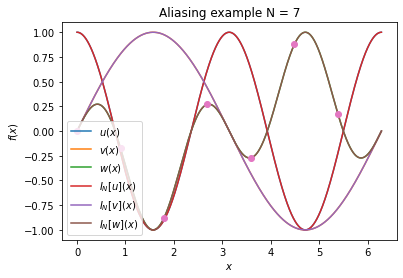

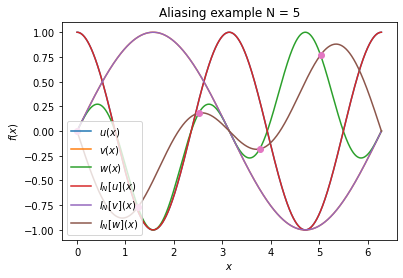

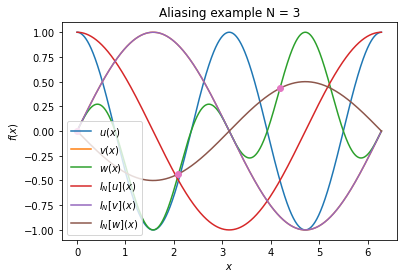

In [8]:
# Test functions definitions
u = lambda x: np.cos(2*x)
v = lambda x: np.sin(x)
w = lambda x: u(x) * v(x)

def plot_aliasing_example(N):
    # Grid values
    xF = np.linspace(0, 2 * np.pi, N, endpoint=False)
    
    # Plot values
    x = np.linspace(0, 2 * np.pi, 10000)
    
    # Transformation and evaluation of the interpolants
    uk = fourier_transform(u(xF))
    vk = fourier_transform(v(xF))
    wk = fourier_transform(w(xF))
    u_interpolant = fourier_interpolant(uk, x)
    v_interpolant = fourier_interpolant(vk, x)
    w_interpolant = fourier_interpolant(wk, x)
    
    # Plot
    plt.figure()
    plt.plot(x, u(x), label="$u(x)$")
    plt.plot(x, v(x), label="$v(x)$")
    plt.plot(x, w(x), label="$w(x)$")
    plt.plot(x, np.real(u_interpolant), label="$I_N[u](x)$")
    plt.plot(x, np.real(v_interpolant), label="$I_N[v](x)$")
    plt.plot(x, np.real(w_interpolant), label="$I_N[w](x)$")
    plt.plot(xF, w(xF), 'o')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend()
    plt.title("Aliasing example N = " + str(N))
    plt.show()


# We have I_N[u]=u,I_N[v]=v,I_N[w]=w as expected with 1)
plot_aliasing_example(7)

# We have I_N[u]=u,I_N[v]=v, but I_N[w]!=w. Indeed because of aliasing expected e^{+i3x} is replaced by e^{-i2x} and expected e^{-i3x} is replaced by e^{+i2x}
# Thus I_N[w]=-i/4(-e^{i2x} - e^{ix} + e^{-ix} + e^{-i2x})
plot_aliasing_example(5)

# We have I_N[v]=v but I_N[u]!=u. Actually because of aliasing we get I_N[u] = 1/2 (e^{ix} + e^{-ix}) = cos(x)
# I_N[w]!=w. Because of aliasing we have: I_N[w]=i/4(e^{ix} - e^{-ix}) = - sin(x)/2
plot_aliasing_example(3)


**3)** Generally with spectral methods it is easier to compute products in physical space to avoid some convolutions in spectral space. In this case we talk about **pseudo-spectral methods**. On a numerical problem, what should we do generally before and after computing products $u \times v$ in physical space?

<span style="color:red">**Answer:**<br/><br/>
If we want to avoid unwanted aliasing effects, we should use a *de-aliasing* algorithm. The idea is to make sure we have enough frequencies to properly compute a product $u\times v$ in physical space. Typically we can pad spectral representations of $u$ and $v$ with zeros, artificially adding high frequencies and then compute the product in physical space. Then going back to spectral space, we have to truncate the spectral representation of the product, cutting high frequencies to come back to the initial spectral order.
</span>

**BONUS: 4)** Propose a *de-aliasing* algorithm that computes $\hat{w}_k$ coefficients given the sets of $\hat{u}_k$ and $\hat{v}_k$ coefficients and which avoids unwanted aliasing effects.

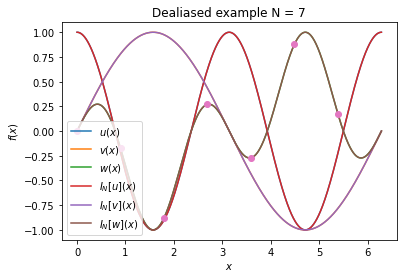

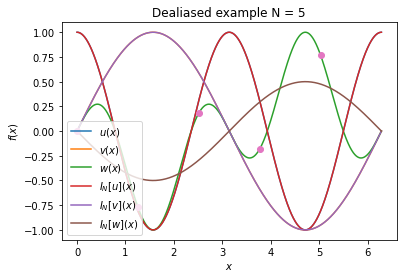

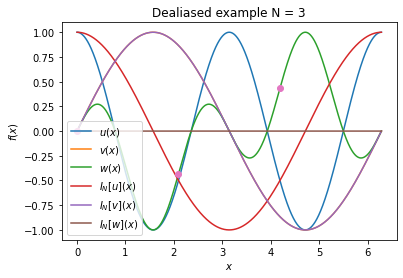

In [9]:
# We propose a de-aliasing algorithm for odd values of N only here.
def fourier_dealiased_product(uk, vk):
    N = len(uk)
    if N % 2 != 1:
        raise ValueError("Even values of N unhandled.")
        
    # We pad the fourier coefficients of the input to get twice as many frequencies to properly compute a product of functions
    M = 2 * N + 1
    uk_padded = np.concatenate([uk[:N // 2 + 1], np.zeros(M - N), uk[N // 2 + 1:]])
    vk_padded = np.concatenate([vk[:N // 2 + 1], np.zeros(M - N), vk[N // 2 + 1:]])
    
    # We come back to physical space to compute the product u * v
    u_padded = fourier_inv_transform(uk_padded)
    v_padded = fourier_inv_transform(vk_padded)
    w_padded = u_padded * v_padded
    
    # We go back to spectral space and return a truncated set of coefficients
    wk_padded = fourier_transform(w_padded)
    return np.concatenate([wk_padded[:N // 2 + 1], wk_padded[M - N // 2:]])

def plot_dealiased_example(N):
    # Grid values
    xF = np.linspace(0, 2 * np.pi, N, endpoint=False)
    
    # Plot values
    x = np.linspace(0, 2 * np.pi, 10000)
    
    # Transformation and evaluation of the interpolants
    uk = fourier_transform(u(xF))
    vk = fourier_transform(v(xF))
    wk = fourier_dealiased_product(uk, vk)
    u_interpolant = fourier_interpolant(uk, x)
    v_interpolant = fourier_interpolant(vk, x)
    w_interpolant = fourier_interpolant(wk, x)
    
    # Plot
    plt.figure()
    plt.plot(x, u(x), label="$u(x)$")
    plt.plot(x, v(x), label="$v(x)$")
    plt.plot(x, w(x), label="$w(x)$")
    plt.plot(x, np.real(u_interpolant), label="$I_N[u](x)$")
    plt.plot(x, np.real(v_interpolant), label="$I_N[v](x)$")
    plt.plot(x, np.real(w_interpolant), label="$I_N[w](x)$")
    plt.plot(xF, w(xF), 'o')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend()
    plt.title("Dealiased example N = " + str(N))
    plt.show()


# We have I_N[u]=u,I_N[v]=v,I_N[w]=w, nothing changed
plot_dealiased_example(7)

# We have I_N[u]=u,I_N[v]=v, and I_N[w]!=w but here we do have a proper truncated result of I_N[u]*I_N[v]
plot_dealiased_example(5)

# We still have I_N[v]=v and I_N[u]!=u, and I_N[w] is here a proper truncated result of I_N[u]*I_N[v] (in this specfic case we get I_N[w] = 0)
plot_dealiased_example(3)